# Calculo del número $\pi$ usando la seríe de Leibniz con openMP

<center> Juan Andrés Bueno Ramírez</br>Jhon Sebastián Moreno Triana<center>

Usando la librería de ```c```, openMP, se usaron distinto número de hilos para aproximar el número $\pi$ usando ```2e9``` iteraciones. Midiendo el tiempo de uso de la CPU respecto del número de hilos es posible obtener el speedUp del programa paralelizado.

In [50]:
import numpy as np
import matplotlib.pylab as mp

In [51]:
!nvcc --version

/bin/bash: line 1: nvcc: command not found


## Paralelismo sin "False Sharing"
Para la primera parte del uso de la serie es usó el siguiente código:

Obteniendo así los siguientes datos y gráficos:

In [52]:
num = np.linspace(1,16,16)
times = [[6.105939, 6.109309, 6.098275] #1
         ,[5.6490185, 5.563238, 5.509354]  #2
         ,[5.71018510,6.531335,5.816265]  #3
         ,[6.193749,6.216625,6.245160]     #4
         ,[5.459105,5.611680,6.308409]     #5
         ,[5.456912,5.351929,6.264694]     #6
         ,[5.236502,5.411522,5.328814]     #7
         ,[5.186958,5.148660,5.411944]     #8
         ,[5.146845,4.846850,4.896618]     #9
         ,[4.515192,4.756069,4.886896]     #10
         ,[4.436769,4.736388,4.388220]     #11
         ,[4.227187,4.493810,4.325714]     #12
         ,[4.319720,4.402232,4.116142 ]     #13
         ,[4.438723,4.290866,4.301049]     #14
         ,[4.278346,4.410250,4.309527]     #15
         ,[4.413988,4.421606,4.455076]]    #16
time = np.array([ sum(t)/len(t) for t in times])
num[1:16:2]

array([ 2.,  4.,  6.,  8., 10., 12., 14., 16.])

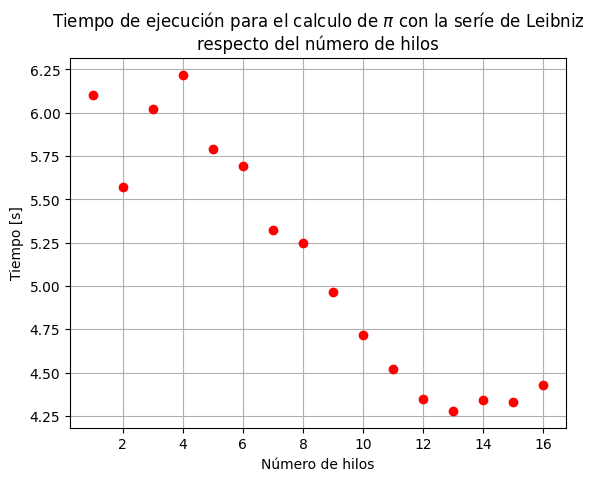

In [59]:
#time = [65.06, 99.65, 66.94,48.66,32.42,19.51,16.22,14.63]
mp.plot(num,time, "ro")
#mp.plot(num[1:-1:2],time[1:-1:2], "ro")
mp.title("Tiempo de ejecución para el calculo de $\\pi$ con la seríe de Leibniz\nrespecto del número de hilos")
mp.xlabel("Número de hilos")
mp.ylabel("Tiempo [s]")
mp.grid(True)

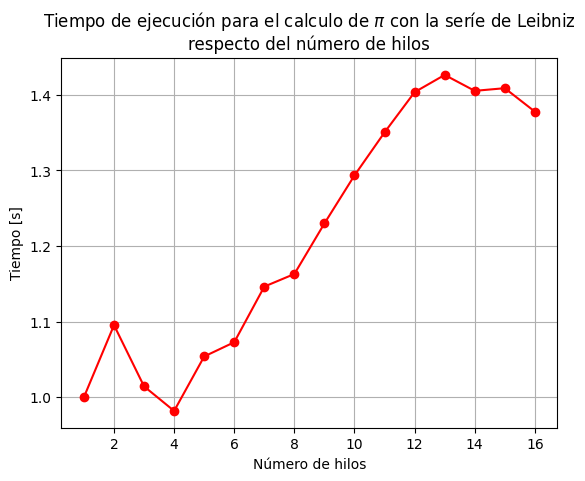

In [54]:
mp.plot(num,time[0]/time, "r-")
mp.plot(num,time[0]/time, "ro")
mp.title("Tiempo de ejecución para el calculo de $\\pi$ con la seríe de Leibniz\nrespecto del número de hilos")
mp.xlabel("Número de hilos")
mp.ylabel("Tiempo [s]")
mp.grid(True)

## Paralelismo con False Sharing

Para el caso de paralelismo con False Sharing se usó el siguiente código:

Obteniendo los siguientes resultados:

In [60]:
numFS = np.linspace(1,16,16)
timesFS = [[6.961350, 7.031040, 6.997795] #1
         ,[3.549716,3.581995,3.865562 ]  #2
         ,[3.313290,3.077563,2.802784]  #3
         ,[2.701436,3.013114,3.239439]     #4 2.873772
         ,[2.757408,3.337182,2.921913 ]     #5
         ,[2.848906,3.118947,2.695557]     #6
         ,[2.586457,2.758575,3.226856]     #7
         ,[2.812038,3.055407,2.739371]     #8
         ,[2.660336,3.017185,2.752522]     #9
         ,[2.673605,2.760993,2.591477]     #10
         ,[2.748849,2.730237,2.695759]     #11
         ,[2.828354,2.720828,2.738376]     #12
         ,[2.744570,2.777394,2.782369]     #13
         ,[2.635157,2.843871,2.691307]     #14
         ,[2.802269,2.788157,2.796994]     #15
         ,[2.687675,2.772212,2.810523]]    #16

timeFS = np.array([ sum(t)/len(t) for t in timesFS])

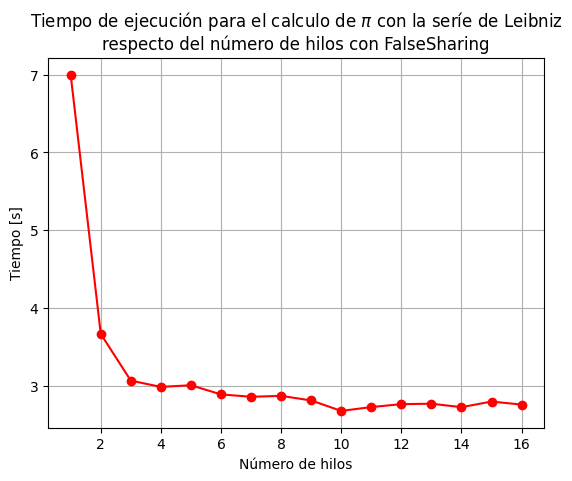

In [61]:
mp.plot(numFS,timeFS, "r-")
mp.plot(numFS,timeFS, "ro")
mp.title("Tiempo de ejecución para el calculo de $\\pi$ con la seríe de Leibniz\nrespecto del número de hilos con FalseSharing")
mp.xlabel("Número de hilos")
mp.ylabel("Tiempo [s]")
mp.grid(True)

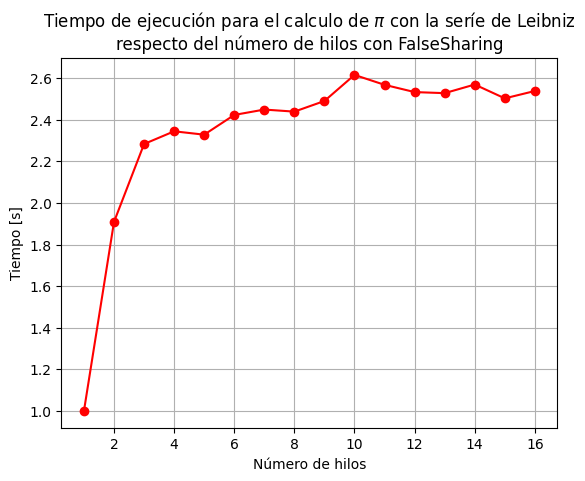

In [62]:
mp.plot(numFS,timeFS[0]/timeFS, "r-")
mp.plot(numFS,timeFS[0]/timeFS, "ro")
mp.title("Tiempo de ejecución para el calculo de $\\pi$ con la seríe de Leibniz\nrespecto del número de hilos con FalseSharing")
mp.xlabel("Número de hilos")
mp.ylabel("Tiempo [s]")
mp.grid(True)

## Comparación FS y no FS

Usando la expresión $\dfrac{T_{nFS}}{T_{FS}}$ se puede notar el comportamiento del rendimiento usando las dos técnicas.

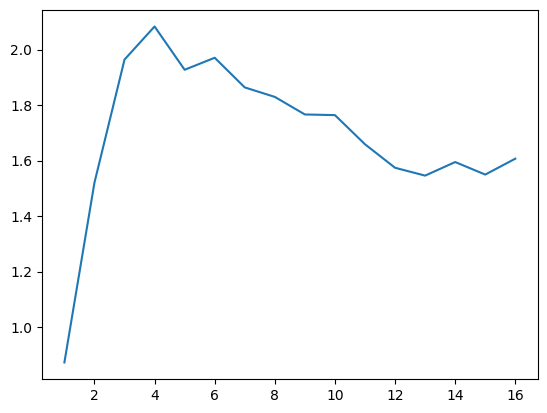

In [63]:
mp.plot(num, time/timeFS)

Donde todos los valores son mayores a 1.